<a href="https://colab.research.google.com/github/meichen-8/Bi183/blob/master/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics.pairwise import euclidean_distances


Text(159.0, 0.5, 'genes')

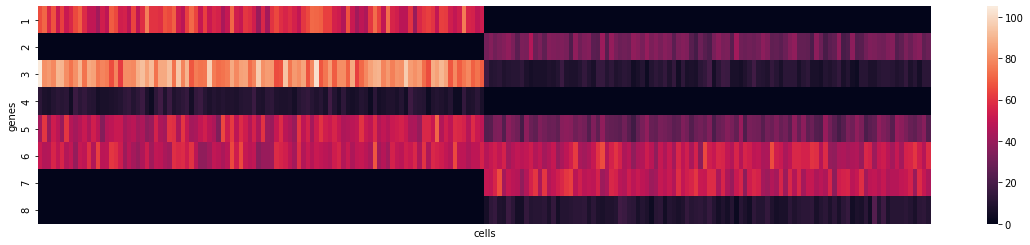

In [0]:
lam=(60, 0, 80, 10, 50, 50, 0, 0, 0, 30, 10, 0, 30, 50, 50, 10)
data=np.zeros([200,8])
gene=np.random.poisson(lam, size=(100, 16))
data[0:100,0:8]=gene[:,0:8]
data[100:200,0:8]=gene[:,8:16]
fig=plt.figure(figsize=(20,4))
data=np.transpose(data)
sn.heatmap(data,yticklabels=[1,2,3,4,5,6,7,8],xticklabels=False)
plt.xlabel('cells')
plt.ylabel('genes')

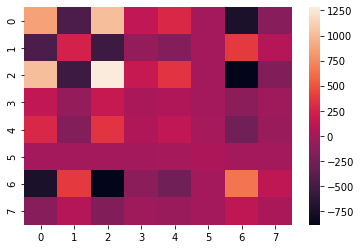

In [0]:
m = data.mean(axis=1)
ndata=np.zeros_like(data)
for k in range(data.shape[1]):
    ndata[:,k]=data[:,k]-m
cv=np.matmul(ndata,np.transpose(ndata))/199
sn.heatmap(cv)

[   4.87061568    5.15719176   15.82294593   23.23229243   33.88031086
   34.69177164   51.24365318 3137.98652003]


Text(0, 0.5, 'lambda')

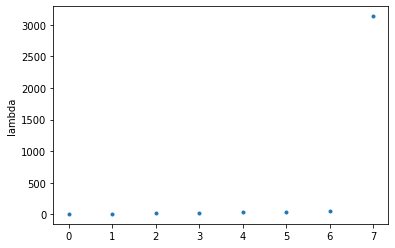

In [0]:
w,v=np.linalg.eigh(cv)
print(w)
plt.plot(w,'.')
plt.ylabel('lambda')

Text(0.5, 15.0, 'v')

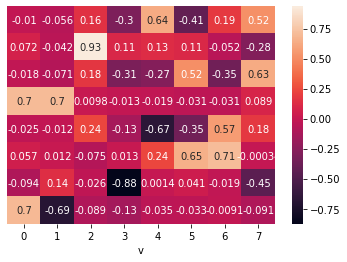

In [0]:
sn.heatmap(v,yticklabels=False,annot=True)
plt.xlabel('v')

In [0]:
def mynnmf(D,k):
  error=[]
  ng,nc=np.shape(D)
  W=np.random.uniform(1,100,[ng,k])
  H=np.random.uniform(1,100,[k,nc])
  for i in range(1000):
    H=np.divide(np.multiply(H,np.transpose(W)@D),np.transpose(W)@W@H)
    W=np.divide(np.multiply(W,D@np.transpose(H)),W@H@np.transpose(H))
    error.append( np.linalg.norm(D-W@H) )
  return W,H,error

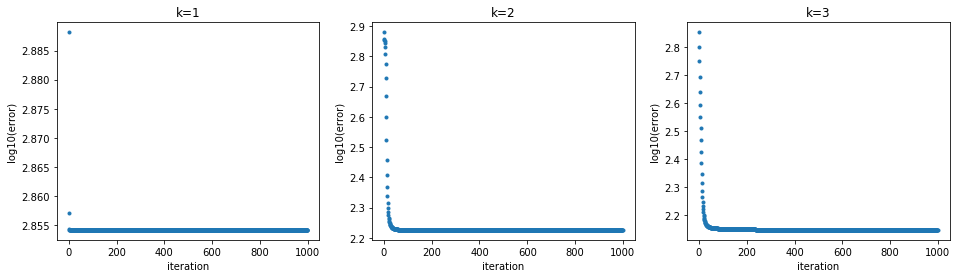

In [0]:
fig=plt.figure(figsize=(16,4))
for k in range(1,4):
  ax=fig.add_subplot(1,3,k)
  W,H,error=mynnmf(data,k)
  ax.plot(np.log10(error),'.')
  plt.title('k='+str(k))
  plt.xlabel('iteration')
  plt.ylabel('log10(error)')

In [0]:
from sklearn.decomposition import NMF
model = NMF(n_components=k, init='random', random_state=0)
w = model.fit_transform(data)
h = model.components_
print(np.log10(np.linalg.norm(data-w@h)))